##Capstone Project - TTS in Kannada With Emotions
By: Rishika Satheesh, Deboleena Mukherjee, Nikila S and Minal H R
PES University

Importing necessary packages:

In [67]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

Reading train data from csv file:

In [68]:
df = pd.read_csv(r"/content/emo_ds_7.csv")
df.head()


,Text,Class
0,ಹೋಟೆಲ್ ಕಳಪೆಯಾಗಿ ನಿರ್ವಹಿಸಲ್ಪಟ್ಟಿದೆ,0
1,ಅವರು ಕೆಟ್ಟ ಸೇವೆಯನ್ನು ನೀಡಿದರು,0
2,ಕ್ಯಾಬ್‌ನ ಒಳಭಾಗವನ್ನು ಸರಿಯಾಗಿ ನಿರ್ವಹಿಸಲಾಗಿಲ್ಲ,0
3,ಕ್ಯಾಬ್ ಒಳಭಾಗ ಕೊಳಕು,0
4,ನಾವು ಅಗ್ಗದ ವಿಮಾನವನ್ನು ಬುಕ್ ಮಾಡಬಹುದಿತ್ತು,0


Count of sentences for each emotion label in train dataset:

0 - Angry

1 - Happy

2 - Neutral

3 - Sad

In [69]:
df.groupby('Class').Class.count()


Class
0    402
1    385
2    392
3    392
Name: Class, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


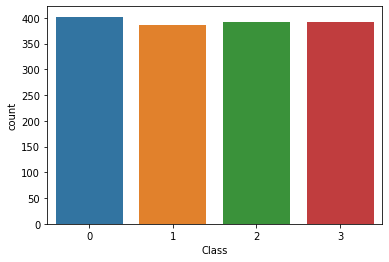

In [70]:
sns.countplot(df['Class'])

In [71]:
X = df['Text']
y = df['Class']

Reading test data from csv file:

In [72]:
ds = pd.read_csv(r"/content/emo_ds_7_test.csv")
ds.head()


,Text,Class
0,ಹೋಟೆಲ್ ಕಳಪೆಯಾಗಿ ನಿರ್ವಹಿಸಲ್ಪಟ್ಟಿದೆ,0
1,ಇದು ಸರಿಯಾಗಿ ಕೆಲಸ ಮಾಡುತ್ತಿಲ್ಲ,0
2,ನನ್ನ ಅದೃಷ್ಟ ಚೆನ್ನಾಗಿಲ್ಲ,0
3,ನಮಗೆ ತುಂಬಾ ಕೆಟ್ಟ ಅನುಭವವಾಗಿದೆ,0
4,ನೀನು ನಿಷ್ಪ್ರಯೋಜಕ,0


Count of sentences for each emotion label in test dataset:
    

0 - Angry

1 - Happy

2 - Neutral

3 - Sad

In [73]:
ds.groupby('Class').Class.count()
#0-angry 
#1-happy 
#2-neutral
#3-sad

Class
0    74
1    78
2    83
3    75
Name: Class, dtype: int64

In [74]:
X_train=X
y_train=y

X_test=ds['Text']
y_test=ds['Class']

Number of sentences in train dataset:

In [75]:
len(X_train)

1571

In [76]:
X_train

0                       ಹೋಟೆಲ್ ಕಳಪೆಯಾಗಿ ನಿರ್ವಹಿಸಲ್ಪಟ್ಟಿದೆ
1                            ಅವರು ಕೆಟ್ಟ ಸೇವೆಯನ್ನು ನೀಡಿದರು
2             ಕ್ಯಾಬ್‌ನ ಒಳಭಾಗವನ್ನು ಸರಿಯಾಗಿ ನಿರ್ವಹಿಸಲಾಗಿಲ್ಲ
3                                      ಕ್ಯಾಬ್ ಒಳಭಾಗ ಕೊಳಕು
4                 ನಾವು ಅಗ್ಗದ ವಿಮಾನವನ್ನು ಬುಕ್ ಮಾಡಬಹುದಿತ್ತು
                              ...                        
1566         ಅವನ ತಂದೆಯ ಕೋಪದ ದನಿಯು ಕಪಾಳಮೋಕ್ಷದಿಂದ ಕೂಡಿತ್ತು.
1567    ಆಗ ಒಬ್ಬ ತೆಳ್ಳಗಿನ, ಮಸುಕಾದ ಸೈನಿಕನು, ಅವನ ಕುತ್ತಿಗೆ...
1568              ಅವಳ ಕಣ್ಣುಗಳು ಕೋಪಗೊಂಡ ಮೋಡಗಳ ಕಡೆಗೆ ಹೋದವು.
1569    ಅವನಿಗೆ ಒಂದು ನಿಮಿಷ ಕೋಪ ಮತ್ತು ಮರುಕ್ಷಣ ತಮಾಷೆ ಮಾಡಿ...
1570    ಅವನ ದೇಹವು ಕೋಪಗೊಂಡ ಶಕ್ತಿಯಿಂದ ಅಲೆಯುತ್ತಿತ್ತು, ಅದು...
Name: Text, Length: 1571, dtype: object

Number of sentences in test dataset:

In [77]:
len(X_test)

310

In [78]:
X_test

0                      ಹೋಟೆಲ್ ಕಳಪೆಯಾಗಿ ನಿರ್ವಹಿಸಲ್ಪಟ್ಟಿದೆ
1                           ಇದು ಸರಿಯಾಗಿ ಕೆಲಸ ಮಾಡುತ್ತಿಲ್ಲ
2                                ನನ್ನ ಅದೃಷ್ಟ ಚೆನ್ನಾಗಿಲ್ಲ
3                           ನಮಗೆ ತುಂಬಾ ಕೆಟ್ಟ ಅನುಭವವಾಗಿದೆ
4                                       ನೀನು ನಿಷ್ಪ್ರಯೋಜಕ
                             ...                        
305    ನಾನು ತಡರಾತ್ರಿಯಲ್ಲಿ ಕೆಲಸ ಮಾಡುವುದನ್ನು ದ್ವೇಷಿಸುತ್...
306    ಈ ಹಾಡು ಎಷ್ಟು ದುಃಖಕರವಾಗಿದೆಯೆಂದರೆ ನನ್ನ ಏಳು ವರ್ಷದ...
307     ನಾನು ಈಗಾಗಲೇ ಶಾಲೆಯ ಕೆಲಸದಿಂದ ತುಂಬಾ ಆಯಾಸಗೊಂಡಿದ್ದೇನೆ
308    ಕಾಲೇಜು ದಿನಗಳು ಹೆಚ್ಚು ಖುಷಿಯಾಗಿರಬೇಕೆಂದು ನಾನು ಬಯಸ...
309    ನನಗೆ ತುಂಬ ಬೇಜಾರಾಗಿದೆ. ನನ್ನ ಒಡಹುಟ್ಟಿದವರು ಪಾರ್ಟ...
Name: Text, Length: 310, dtype: object

In [79]:
type(y_train)

pandas.core.series.Series

List of stopwords:

In [80]:
stop_words = ['',' ','.','ಈ','ಆದರೆ','ಎಂದು','ಅವರ','ಮತ್ತು','ಎಂಬ','ಅವರು','ಒಂದು','ಬಗ್ಗೆ','ಆ','ಇದೆ','ಇದು','ನಾನು','ಮೂಲಕ','ನನ್ನ','ಅದು','ಮೇಲೆ','ಈಗ','ಹಾಗೂ','ಇಲ್ಲ','ಮೊದಲ','ನನಗೆ','ಹೆಚ್ಚು','ಅವರಿಗೆ','ತಮ್ಮ','ಮಾಡಿ','ನಮ್ಮ','ಮಾತ್ರ','ದೊಡ್ಡ','ಅದೇ','ಕೂಡ','ಸಿನಿಮಾ','ಯಾವುದೇ','ಯಾವ','ಆಗ','ತುಂಬಾ','ನಾವು','ದಿನ','ಬೇರೆ','ಅವರನ್ನು','ಎಲ್ಲಾ','ನೀವು','ಸಾಕಷ್ಟು','ಕನ್ನಡ','ಹೊಸ','ಮುಂದೆ','ಹೇಗೆ','ನಂತರ','ಇಲ್ಲಿ','ಕೆಲಸ','ಅಲ್ಲ','ಬಳಿಕ','ಒಳ್ಳೆಯ','ಹಾಗಾಗಿ','ಒಂದೇ','ಜನ','ಅದನ್ನು','ಬಂದ','ಕಾರಣ','ಅವಕಾಶ','ವರ್ಷ','ನಿಮ್ಮ','ಇತ್ತು','ಚಿತ್ರ','ಹೇಳಿ','ಮಾಡಿದ','ಅದಕ್ಕೆ','ಆಗಿ','ಎಂಬುದು','ಅಂತ','2','ಕೆಲವು','ಮೊದಲು','ಬಂದು','ಇದೇ','ನೋಡಿ','ಕೇವಲ','ಎರಡು','ಇನ್ನು','ಅಷ್ಟೇ','ಎಷ್ಟು','ಚಿತ್ರದ','ಮಾಡಬೇಕು','ಹೀಗೆ','ಕುರಿತು','5','ಉತ್ತರ','ಎಂದರೆ','ಇನ್ನೂ','ಮತ್ತೆ','ಏನು','ಪಾತ್ರ','ಮುಂದಿನ','ಸಂದರ್ಭದಲ್ಲಿ','ಮಾಡುವ','ವೇಳೆ','ನನ್ನನ್ನು','ಮೂರು','ಅಥವಾ','ಜೊತೆಗೆ','ಹೆಸರು','ಚಿತ್ರದಲ್ಲಿ']
#stop_words

Length of stopword list:

In [81]:
len(stop_words)

105

Using CountVectorizer to produce sparse representation of data:

In [82]:
def my_tokenizer(s):
    return s.split(' ')

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=2, ngram_range=(1, 3), encoding='ISCII',tokenizer=my_tokenizer,stop_words=stop_words).fit(X_train)


/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [83]:
print(len(vect.get_feature_names())) 

1335


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [84]:
vect.get_feature_names()  

['!!',
 '!!!',
 '-',
 '...',
 '10',
 '15',
 '15 ನಿಮಿಷಗಳ',
 '3',
 '6',
 '7',
 '9',
 ':)',
 'ewww!!',
 'la',
 'rip',
 'ಅಂತಹ',
 'ಅಂತಹ ಉತ್ತಮ',
 'ಅಂತಹ ಸುಂದರವಾದ',
 'ಅಂತಿಮ',
 'ಅಂತಿಮವಾಗಿ',
 'ಅಂತ್ಯಕ್ರಿಯೆಯಲ್ಲಿ',
 'ಅಂದರೆ',
 'ಅಂದ್ರೆ',
 'ಅಕ್ಕಿ',
 'ಅಕ್ಕಿ ಕೊಡು',
 'ಅಗತ್ಯವಿರುವ',
 'ಅಗ್ಗದ',
 'ಅಗ್ಗದ ವಿಮಾನ',
 'ಅಗ್ಗದ ವಿಮಾನ ಟಿಕೆಟ್',
 'ಅಗ್ಗದ ವಿಮಾನವನ್ನು',
 'ಅಗ್ಗದ ವಿಮಾನವನ್ನು ಬುಕ್',
 'ಅಜ್ಜ',
 'ಅಜ್ಜಿಯನ್ನು',
 'ಅಣ್ಣ',
 'ಅತಿ',
 'ಅತೃಪ್ತನಾಗಿದ್ದೇನೆ',
 'ಅತೃಪ್ತಿ',
 'ಅತೃಪ್ತಿ ಹೊಂದಿದ್ದೇನೆ',
 'ಅತೃಪ್ತಿಯನ್ನು',
 'ಅತೃಪ್ತಿಯನ್ನು ಅನುಭವಿಸಲು',
 'ಅತೃಪ್ತಿಯನ್ನು ಅನುಭವಿಸಲು ವರ್ಷದ',
 'ಅತ್ಯಂತ',
 'ಅತ್ಯುತ್ತಮ',
 'ಅದರ',
 'ಅದರಲ್ಲಿ',
 'ಅದರಿಂದ',
 'ಅದೃಷ್ಟ',
 'ಅದೊಂದು',
 'ಅದ್ಭುತ',
 'ಅದ್ಭುತ!',
 'ಅದ್ಭುತವಾಗಿ',
 'ಅದ್ಭುತವಾಗಿತ್ತು!',
 'ಅದ್ಭುತವಾಗಿದೆ',
 'ಅದ್ಭುತವಾದ',
 'ಅಧ್ಯಯನ',
 'ಅಧ್ಯಯನ ಮಾಡಲು',
 'ಅನಾರೋಗ್ಯದಿಂದ',
 'ಅನಾರೋಗ್ಯದಿಂದ ಬಳಲುತ್ತಿದ್ದೇನೆ',
 'ಅನಿರೀಕ್ಷಿತವಾಗಿತ್ತು',
 'ಅನಿಸಲಿಲ್ಲ',
 'ಅನಿಸುತ್ತದೆ',
 'ಅನಿಸುತ್ತದೆ.',
 'ಅನಿಸುತ್ತಿದೆ',
 'ಅನಿಸುತ್ತಿಲ್ಲ',
 'ಅನುಭವಿಸಲು',
 'ಅನುಭವಿಸಲು ವರ್ಷದ',
 'ಅನುಭವಿಸಲು ವರ್ಷದ ಸುಲಭವಾದ',
 'ಅನುಭವಿಸುತ್ತಿದ್ದೇನೆ',
 'ಅನುಭವಿಸುತ್ತೇನೆ',
 'ಅನುಭವಿಸುವ',
 'ಅ

Getting a bag of words representation for all the documents:

In [85]:
X_train_vectorized = vect.transform(X_train)    
X_train_vectorized

<1571x1335 sparse matrix of type '<class 'numpy.int64'>'
	with 4830 stored elements in Compressed Sparse Row format>

In [86]:
X_train_vectorized.shape

(1571, 1335)

________________________________________________

## Multinomial Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
mlr = LogisticRegression(C=0.05, max_iter=10000, solver='newton-cg', multi_class='multinomial')
mlr.fit(X_train_vectorized, y_train)

LogisticRegression(C=0.05, max_iter=10000, multi_class='multinomial',
                   solver='newton-cg')

In [88]:
from sklearn.metrics import accuracy_score
X_test_transformed = vect.transform(X_test)
y_pred_train = mlr.predict(X_train_vectorized)
y_pred_test = mlr.predict(X_test_transformed)

Train and Test Accuracies:

In [89]:
print('Train accuracy = ', accuracy_score(y_train, y_pred_train))
print('Test accuracy = ', accuracy_score(y_test, y_pred_test))

Train accuracy =  0.7428389560789306
Test accuracy =  0.6903225806451613


Predicting sentences

In [90]:
tweets = pd.DataFrame(["ನೀವು ಯಾವುದೇ ಪ್ರಯೋಜನವಿಲ್ಲ",#0angry
                       "ತುಂಬಾ ಒಳ್ಳೆಯದು",#1happy
                       "ನನ್ನ ಖಾತೆಯಲ್ಲಿ ಎಷ್ಟು ಬ್ಯಾಲೆನ್ಸ್ ಇದೆ",#2neutral
                       "ಕ್ಯಾಬ್ ಚಾಲಕ ನನ್ನನ್ನು ನಿಂದಿಸಿದ",#3sad
                       "ನನ್ನ ನಾಯಿ ನಿನ್ನೆ ಸತ್ತುಹೋಯಿತು.", #sad
                       "ನಾನು ಬಡ್ತಿ ಹೊಂದಲು ಸಂತೋಷಪಡುತ್ತೇನೆ",#1happy
                       "ಮರುಪ್ರಾರಂಭಿಸಿದಾಗಲೂ ಆಗುತ್ತಿಲ್ಲ",#3sad
                       "ನನ್ನ ಪರೀಕ್ಷೆಯಲ್ಲಿ ನಾನು ಉತ್ತಮ ಅಂಕಗಳನ್ನು ಗಳಿಸಿದೆ",#1happy
                       "ಅವರು ನನ್ನನ್ನು ನಾಳೆ ಬರಲು ಹೇಳಿದರು",#2neutral
                       "ಅವನು ನನ್ನನ್ನು ಗದರಿಸಿದನು",#3sad
                       "ಸೇವೆಯು ಹತಾಶವಾಗಿತ್ತು",#0angry
                       "ಇವತ್ತು ಮಂಗಳವಾರ",
                       
       ])
true_emo=[0,1,2,3,3,1,3,1,2,3,0,2]

tweet_count = vect.transform(tweets[0])

In [91]:
tweet_pred = mlr.predict(tweet_count)
print(tweet_pred)


[2 1 2 2 3 0 2 1 2 3 2 2]


Comparing between actual emotions and predicted emotions

In [92]:
final_result=tweets.copy()
final_result['true_emotion']=true_emo
final_result['result']=tweet_pred
final_result=final_result.rename(columns={0:"text"})

final_result=final_result.rename(columns={"result":"predicted_emotion"})
final_result=final_result.rename(columns={"true_emotion":"actual_emotion"})
final_result=final_result.replace({0: 'Angry', 1: 'Happy', 2: 'Neutral', 3: 'Sad'})
final_result

,text,actual_emotion,predicted_emotion
0,ನೀವು ಯಾವುದೇ ಪ್ರಯೋಜನವಿಲ್ಲ,Angry,Neutral
1,ತುಂಬಾ ಒಳ್ಳೆಯದು,Happy,Happy
2,ನನ್ನ ಖಾತೆಯಲ್ಲಿ ಎಷ್ಟು ಬ್ಯಾಲೆನ್ಸ್ ಇದೆ,Neutral,Neutral
3,ಕ್ಯಾಬ್ ಚಾಲಕ ನನ್ನನ್ನು ನಿಂದಿಸಿದ,Sad,Neutral
4,ನನ್ನ ನಾಯಿ ನಿನ್ನೆ ಸತ್ತುಹೋಯಿತು.,Sad,Sad
5,ನಾನು ಬಡ್ತಿ ಹೊಂದಲು ಸಂತೋಷಪಡುತ್ತೇನೆ,Happy,Angry
6,ಮರುಪ್ರಾರಂಭಿಸಿದಾಗಲೂ ಆಗುತ್ತಿಲ್ಲ,Sad,Neutral
7,ನನ್ನ ಪರೀಕ್ಷೆಯಲ್ಲಿ ನಾನು ಉತ್ತಮ ಅಂಕಗಳನ್ನು ಗಳಿಸಿದೆ,Happy,Happy
8,ಅವರು ನನ್ನನ್ನು ನಾಳೆ ಬರಲು ಹೇಳಿದರು,Neutral,Neutral
9,ಅವನು ನನ್ನನ್ನು ಗದರಿಸಿದನು,Sad,Sad


Sample Dataset Accuracy

In [93]:
c=0
for i in range(len(final_result['text'])):
    if final_result['predicted_emotion'][i]==final_result['actual_emotion'][i]:
        c+=1
print("Accuracy obtained in sample dataset: ",c/len(final_result['text']))

Accuracy obtained in sample dataset:  0.5833333333333334


F1 Score of MLR model:

In [94]:
from sklearn.metrics import f1_score
print('F1 score:', f1_score(y_test, y_pred_test, average="macro"))

F1 score: 0.690939393601063


In [95]:
from sklearn.metrics import classification_report

Classification report of MLR model:

In [96]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.61      0.69        74
           1       0.72      0.62      0.66        78
           2       0.56      0.89      0.69        83
           3       0.85      0.63      0.72        75

    accuracy                           0.69       310
   macro avg       0.73      0.69      0.69       310
weighted avg       0.73      0.69      0.69       310



Saving MLR model to disk:

In [97]:
pickle.dump(mlr, open('mlr_model.sav', 'wb'))

__________________________________________________________________________________________


## Decision Tree Classifier

In [98]:
from sklearn import tree
# Decision tree fit
dt = tree.DecisionTreeClassifier()
dt.fit(X_train_vectorized, y_train)


DecisionTreeClassifier()

In [99]:
#calculating score
X_test_transformed = vect.transform(X_test)
y_dt_train = dt.predict(X_train_vectorized)
y_dt_test = dt.predict(X_test_transformed)


Train and Test Acccuracies:

In [100]:
print('Train accuracy = ', accuracy_score(y_train, y_dt_train))
print('Test accuracy = ', accuracy_score(y_test, y_dt_test))

Train accuracy =  0.9140674729471674
Test accuracy =  0.8161290322580645


Predicting sentences:

In [101]:
#Predicting the emotion of the tweet by dt
tweet_pred = dt.predict(tweet_count)
print(tweet_pred)
tweets[0]

[2 1 2 1 3 2 2 2 2 3 2 2]


0                           ನೀವು ಯಾವುದೇ ಪ್ರಯೋಜನವಿಲ್ಲ
1                                     ತುಂಬಾ ಒಳ್ಳೆಯದು
2                ನನ್ನ ಖಾತೆಯಲ್ಲಿ ಎಷ್ಟು ಬ್ಯಾಲೆನ್ಸ್ ಇದೆ
3                      ಕ್ಯಾಬ್ ಚಾಲಕ ನನ್ನನ್ನು ನಿಂದಿಸಿದ
4                      ನನ್ನ ನಾಯಿ ನಿನ್ನೆ ಸತ್ತುಹೋಯಿತು.
5                   ನಾನು ಬಡ್ತಿ ಹೊಂದಲು ಸಂತೋಷಪಡುತ್ತೇನೆ
6                      ಮರುಪ್ರಾರಂಭಿಸಿದಾಗಲೂ ಆಗುತ್ತಿಲ್ಲ
7     ನನ್ನ ಪರೀಕ್ಷೆಯಲ್ಲಿ ನಾನು ಉತ್ತಮ ಅಂಕಗಳನ್ನು ಗಳಿಸಿದೆ
8                    ಅವರು ನನ್ನನ್ನು ನಾಳೆ ಬರಲು ಹೇಳಿದರು
9                            ಅವನು ನನ್ನನ್ನು ಗದರಿಸಿದನು
10                               ಸೇವೆಯು ಹತಾಶವಾಗಿತ್ತು
11                                    ಇವತ್ತು ಮಂಗಳವಾರ
Name: 0, dtype: object

Comparing between actual emotions and predicted emotions

In [102]:
final_result_dt=tweets.copy()
final_result_dt['true_emotion']=true_emo
final_result_dt['result']=tweet_pred
final_result_dt=final_result_dt.rename(columns={0:"text"})
final_result_dt=final_result_dt.rename(columns={"result":"predicted_emotion"})
final_result_dt=final_result_dt.rename(columns={"true_emotion":"actual_emotion"})
final_result_dt=final_result_dt.replace({0: 'Angry', 1: 'Happy', 2: 'Neutral', 3: 'Sad'})
final_result_dt


,text,actual_emotion,predicted_emotion
0,ನೀವು ಯಾವುದೇ ಪ್ರಯೋಜನವಿಲ್ಲ,Angry,Neutral
1,ತುಂಬಾ ಒಳ್ಳೆಯದು,Happy,Happy
2,ನನ್ನ ಖಾತೆಯಲ್ಲಿ ಎಷ್ಟು ಬ್ಯಾಲೆನ್ಸ್ ಇದೆ,Neutral,Neutral
3,ಕ್ಯಾಬ್ ಚಾಲಕ ನನ್ನನ್ನು ನಿಂದಿಸಿದ,Sad,Happy
4,ನನ್ನ ನಾಯಿ ನಿನ್ನೆ ಸತ್ತುಹೋಯಿತು.,Sad,Sad
5,ನಾನು ಬಡ್ತಿ ಹೊಂದಲು ಸಂತೋಷಪಡುತ್ತೇನೆ,Happy,Neutral
6,ಮರುಪ್ರಾರಂಭಿಸಿದಾಗಲೂ ಆಗುತ್ತಿಲ್ಲ,Sad,Neutral
7,ನನ್ನ ಪರೀಕ್ಷೆಯಲ್ಲಿ ನಾನು ಉತ್ತಮ ಅಂಕಗಳನ್ನು ಗಳಿಸಿದೆ,Happy,Neutral
8,ಅವರು ನನ್ನನ್ನು ನಾಳೆ ಬರಲು ಹೇಳಿದರು,Neutral,Neutral
9,ಅವನು ನನ್ನನ್ನು ಗದರಿಸಿದನು,Sad,Sad


Sample Dataset Accuracy

In [103]:
c=0
for i in range(len(final_result['text'])):
    if final_result['predicted_emotion'][i]==final_result['actual_emotion'][i]:
        c+=1
print("Accuracy obtained in sample dataset: ",c/len(final_result['text']))

Accuracy obtained in sample dataset:  0.5833333333333334


F1 Score for DT model:

In [104]:
print('F1 score:', f1_score(y_test,y_dt_test, average="macro"))

F1 score: 0.8199755523718826


Classification Report for DT model:

In [105]:
print(classification_report(y_test, y_dt_test))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82        74
           1       0.86      0.77      0.81        78
           2       0.68      0.90      0.77        83
           3       0.91      0.84      0.87        75

    accuracy                           0.82       310
   macro avg       0.84      0.81      0.82       310
weighted avg       0.84      0.82      0.82       310



Saving decision tree classifier model to disk:

In [106]:
pickle.dump(dt, open('dt_model.sav', 'wb'))

_________________________________________________________________________

## Predicting Emotions using models trained:

In [107]:
def predictEmotionUsingMLR(input_txt):
    in_txt=pd.DataFrame([input_txt])
    txt_count=vect.transform(in_txt[0])
    loaded_mlr_model = pickle.load(open('mlr_model.sav', 'rb'))
    txt_pred_mlr=loaded_mlr_model.predict(txt_count)
    return txt_pred_mlr
    
def predictEmotionUsingDT(input_txt):
    in_txt=pd.DataFrame([input_txt])
    txt_count=vect.transform(in_txt[0])
    loaded_dt_model = pickle.load(open('dt_model.sav', 'rb'))
    txt_pred_dt=loaded_dt_model.predict(txt_count)
    return txt_pred_dt
    
def callingMLR(ttt):
    output_txt_mlr=predictEmotionUsingMLR(ttt)
    
    if output_txt_mlr==0:
        return "Angry"
    elif output_txt_mlr==1:
        return "Happy"
    elif output_txt_mlr==2:
        
        return "Neutral"
    elif output_txt_mlr==3:
        return "Sad"
    else:
        return "Oops! No emotion identified."

    
def callingDT(ttt):
    
    output_txt_dt=predictEmotionUsingDT(ttt)
    
    if output_txt_dt==0:
        return "Angry"
    elif output_txt_dt==1:
        return "Happy"
    elif output_txt_dt==2:
        
        return "Neutral"
    elif output_txt_dt==3:
        return "Sad"
    else:
        return "Oops! No emotion identified."



## Kannada Text to Speech with Pitch Shifting

In [108]:
pip install gtts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [109]:
pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


importing necessary libraries

In [110]:
from gtts import gTTS
from pydub import AudioSegment
from pydub.playback import play

Default Text To Speech and pitch shifting

In [116]:
#mytext=input("Enter Kannada Text: ")
def saveMp3(mytext):
  language='kn'
  ktts = gTTS(text=mytext, lang=language, slow=False)
  ktts.save("output.mp3")

  #Pitch shifting of output.mp3
  from numpy.random import uniform
  filename = 'output.mp3'
  sound = AudioSegment.from_file(filename, format=filename[-3:])

  octaves = 1
  for octaves in np.linspace(-0.5,0.5,10):
      new_sample_rate = int(sound.frame_rate * (2.0 ** octaves))
      hipitch_sound = sound._spawn(sound.raw_data, overrides={'frame_rate': new_sample_rate})
      hipitch_sound = hipitch_sound.set_frame_rate(44100)
      #export / save pitch changed sound
      hipitch_sound.export(f"ttsf_{octaves}.wav", format="wav")


def playPitch(emo):

  if emo=='Angry':
    return "Play -0.277.wav for anger."
    #play('/content/ttsf_-0.2777777777777778.wav',slow=False)  #speed must be changed to fast
  elif emo=='Happy':
    return "Play 0.5.wav for happy."
    #play('/content/ttsf_0.5.wav') #sounds happy :)
  elif emo=='Neutral':
    return "Play output.mp3 for neutral."
    #play('/content/output.mp3') #is neutral
  else:
    return "Play -0.277.wav for sad."
    #play('/content/ttsf_-0.2777777777777778.wav') #yeah sounds sad :(


open -0.277.wav for anger (to be changed)\
0.5.wav for happy\
output.mp3 for neutral\
-0.277.wav for sad

## **TTS in Kannada with Emotions**


In [119]:
def mainTTS():
  ttt=input("Enter Kannada Text:")
  print("\n")
  mlr_output=callingMLR(ttt)
  dt_output=callingDT(ttt)
  saveMp3(ttt)
  speech_output_mlr=playPitch(mlr_output)
  speech_output_dt=playPitch(dt_output)
  
  print("Results using Multinomial Logistic Regression:",)
  print("Emotion identified using MLR: ",mlr_output)
  print(speech_output_mlr,"\n")

  print("Results using Decision Tree Classifier:")
  print("Emotion identified using DT: ",dt_output)
  print(speech_output_dt,"\n")


mainTTS() #calling the main function

Enter Kannada Text:ನೀನು ಏನು ಮಾಡುತ್ತಿರುವೆ?!


Results using Multinomial Logistic Regression:
Emotion identified using MLR:  Neutral
Play output.mp3 for neutral. 

Results using Decision Tree Classifier:
Emotion identified using DT:  Neutral
Play output.mp3 for neutral. 



Some examples:

ಈ ದಿನ ಸುದಿನ

ನೀನು ಏನು ಮಾಡುತ್ತಿರುವೆ?!

ನಾನು ನಿಮಗಾಗಿ ತುಂಬಾ ಸಂತೋಷವಾಗಿದ್ದೇನೆ